## REINFORCEMENT LEARING FOR STOCK PORTFOLIO MANAGEMENT 

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
# Git Pull operation for FinRl Library/repositry
!git clone https://github.com/jjz5463/DS340W_AutoStockTrading.git

Cloning into 'DS340W_AutoStockTrading'...
remote: Enumerating objects: 285, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 285 (delta 0), reused 0 (delta 0), pack-reused 283
Receiving objects: 100% (285/285), 24.84 MiB | 22.53 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [ ]:
import sys #to use system command
sys.path.append("FinRL-Library") #to directly open this path

In [ ]:
# install yahoo finance packages
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
#install stockstats
!pip install stockstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/quantopian/pyfolio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-tdb2og33
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-tdb2og33
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 1.6 MB 16.4 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75774 sha256=3b7217cabefc4e8a24f9a2f338cc7097ea25e95dddf23e8bf29dd9dfc4edfd23
  Stored in directory: /tmp/pip-ephem-wheel-cache-le74mv1b/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39780 sha256=621dc9248b7322cfee9017d89549ea25118e3b05e2d540408627689943ca6910
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [ ]:
%cd /content/DS340W_AutoStockTrading/FinRL-Library
#current working directory is set

/content/DS340W_AutoStockTrading/FinRL-Library


In [ ]:
import warnings
warnings.filterwarnings("ignore")
#to ignore warnings

In [ ]:
!pip install stable-baselines3
#Install DRL Packages using stable baseline3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177 kB 8.2 MB/s 
     |████████████████████████████████| 1.5 MB 49.4 MB/s 
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616825 sha256=03fa89dfff408a096279bfa710541bd4fa4e93b13e345a9c5ebea286ed30330e
  Stored in directory: /root/.cache/pip/wheels/76/ee/9c/36bfe3e079df99acf5ae57f4e3464ff2771b34447d6d2f2148
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
import pandas as pd #dataframe operations
import numpy as np #array,list operations
import matplotlib 
import matplotlib.pyplot as plt #plot
# matplotlib.use('Agg') 
import datetime 

%matplotlib inline
from finrl.apps import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models_modified2 import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint #pretty print 

import sys
sys.path.append("../FinRL-Library")

import itertools #iteration 

<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)
    #new directories\folders are created if not exists

In [ ]:
tickers=['APOLLOHOSP.NS',
'BAJFINANCE.NS',
'NESTLEIND.NS',
'RELIANCE.NS',
'TECHM.NS',
'ITC.NS',
'KOTAKBANK.NS',
'SHREECEM.NS',
'BRITANNIA.NS',
'BAJAJFINSV.NS',
'INDUSINDBK.NS',
'BAJAJ-AUTO.NS',
'LT.NS',
'ULTRACEMCO.NS',
'BHARTIARTL.NS',
'CIPLA.NS',
'ICICIBANK.NS',
'NTPC.NS',
'HDFCLIFE.NS',
'TCS.NS',
'MARUTI.NS',
'WIPRO.NS',
'TATASTEEL.NS',
'TATACONSUM.NS',
'COALINDIA.NS',
'ONGC.NS',
'HEROMOTOCO.NS',
'HINDALCO.NS',
'TITAN.NS',
'BPL.NS']

In [ ]:
print(tickers)

['APOLLOHOSP.NS', 'BAJFINANCE.NS', 'NESTLEIND.NS', 'RELIANCE.NS', 'TECHM.NS', 'ITC.NS', 'KOTAKBANK.NS', 'SHREECEM.NS', 'BRITANNIA.NS', 'BAJAJFINSV.NS', 'INDUSINDBK.NS', 'BAJAJ-AUTO.NS', 'LT.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS', 'CIPLA.NS', 'ICICIBANK.NS', 'NTPC.NS', 'HDFCLIFE.NS', 'TCS.NS', 'MARUTI.NS', 'WIPRO.NS', 'TATASTEEL.NS', 'TATACONSUM.NS', 'COALINDIA.NS', 'ONGC.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'TITAN.NS', 'BPL.NS']


In [ ]:

df = YahooDownloader(start_date = '2018-01-01',
                     end_date = '2022-08-11',
                     ticker_list = tickers).fetch_data() 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head() #data frame head first 5 rows

,date,open,high,low,close,volume,tic,day
0,2018-01-01,1216.000000,1216.000000,1199.099976,1184.269043,117565.0,APOLLOHOSP.NS,0
1,2018-01-01,3340.000000,3345.050049,3276.399902,2810.548096,174560.0,BAJAJ-AUTO.NS,0
2,2018-01-01,520.799988,530.875000,515.159973,516.265137,448990.0,BAJAJFINSV.NS,0
3,2018-01-01,1759.500000,1760.000000,1720.400024,1706.749146,535319.0,BAJFINANCE.NS,0
4,2018-01-01,487.552704,494.071777,482.410919,470.917511,4719333.0,BHARTIARTL.NS,0


In [ ]:
df.info() #non null missing values
#Open-High-Low-Close Charts show the high and low price a stock attained for a particular period of time as well as the opening and closing prices of the stock for the same period.
#High-Low Charts show the high and low price a stock attained for a particular period of time. 
#Volume Charts show the volume of trading.
#tic is ticker name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34170 entries, 0 to 34169
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    34170 non-null  object 
 1   open    34170 non-null  float64
 2   high    34170 non-null  float64
 3   low     34170 non-null  float64
 4   close   34170 non-null  float64
 5   volume  34170 non-null  float64
 6   tic     34170 non-null  object 
 7   day     34170 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB


In [ ]:
df.tail() #last 5 rows

,date,open,high,low,close,volume,tic,day
34165,2022-08-10,3385.000000,3385.000000,3335.000000,3354.250000,1878359.0,TCS.NS,2
34166,2022-08-10,1056.000000,1059.150024,1043.050049,1055.199951,2823021.0,TECHM.NS,2
34167,2022-08-10,2469.899902,2469.899902,2417.100098,2433.600098,1065998.0,TITAN.NS,2
34168,2022-08-10,6724.350098,6742.100098,6580.549805,6595.649902,271291.0,ULTRACEMCO.NS,2
34169,2022-08-10,435.000000,436.000000,426.299988,430.149994,5664871.0,WIPRO.NS,2


In [ ]:
df.shape 
#Return a tuple representing the dimensionality of the DataFrame. no of rows and coloums

(34170, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2018-01-01,1216.000000,1216.000000,1199.099976,1184.269043,117565.0,APOLLOHOSP.NS,0
1,2018-01-01,3340.000000,3345.050049,3276.399902,2810.548096,174560.0,BAJAJ-AUTO.NS,0
2,2018-01-01,520.799988,530.875000,515.159973,516.265137,448990.0,BAJAJFINSV.NS,0
3,2018-01-01,1759.500000,1760.000000,1720.400024,1706.749146,535319.0,BAJFINANCE.NS,0
4,2018-01-01,487.552704,494.071777,482.410919,470.917511,4719333.0,BHARTIARTL.NS,0


In [ ]:
len(df.tic.unique())
# len Return the number of tickers in a container.

30

In [ ]:
df.tic.value_counts()

APOLLOHOSP.NS    1139
BAJAJ-AUTO.NS    1139
ULTRACEMCO.NS    1139
TITAN.NS         1139
TECHM.NS         1139
TCS.NS           1139
TATASTEEL.NS     1139
TATACONSUM.NS    1139
SHREECEM.NS      1139
RELIANCE.NS      1139
ONGC.NS          1139
NTPC.NS          1139
NESTLEIND.NS     1139
MARUTI.NS        1139
LT.NS            1139
KOTAKBANK.NS     1139
ITC.NS           1139
INDUSINDBK.NS    1139
ICICIBANK.NS     1139
HINDALCO.NS      1139
HEROMOTOCO.NS    1139
HDFCLIFE.NS      1139
COALINDIA.NS     1139
CIPLA.NS         1139
BRITANNIA.NS     1139
BPL.NS           1139
BHARTIARTL.NS    1139
BAJFINANCE.NS    1139
BAJAJFINSV.NS    1139
WIPRO.NS         1139
Name: tic, dtype: int64

 Preprocess Data


In [ ]:

tech_indicators = [    "boll_ub", "boll_lb", # this two are new
'macd',
 'rsi_30',
 'cci_30',
 'dx_30']

 * Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price.
* Moving average convergence divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. 
* The RSI  is a momentum oscillator that measures the speed and change of price movements. 
* Commodity Channel Index (CCI) measures the current price level relative to an average price level over a given period of time.
* Directional Movement Index is based on positive and negative directional indicators and it is used in technical analysis to evaluate the strength of a trend and to avoid trading weak trends.

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicators,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0) #replace null vales
processed = processed.replace(np.inf,0) #min and max in the data frame

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(5)


,date,open,high,low,close,volume,tic,day,boll_ub,boll_lb,macd,rsi_30,cci_30,dx_30,turbulence
8515,2019-02-22,1917.199951,1930.000000,1905.099976,1793.500610,2271955.0,TCS.NS,4,1977.315398,1749.987641,-0.534986,47.470893,-36.865319,24.693495,20.886082
14304,2019-12-12,40.830002,42.090000,40.680000,17.744514,149846710.0,TATASTEEL.NS,3,18.380956,16.288232,0.232248,55.147577,73.463443,14.566607,25.736321
25719,2021-06-24,715.000000,722.450012,712.049988,715.479431,1652982.0,HDFCLIFE.NS,3,721.822513,651.334317,11.186133,59.624813,168.367495,30.527292,28.776395
11003,2019-07-01,270.100006,272.700012,268.500000,265.871399,1425361.0,TATACONSUM.NS,0,269.348830,233.437445,10.397147,67.634585,142.194109,56.658156,24.009790
29126,2021-12-08,1582.650024,1614.800049,1582.050049,1581.775635,1604565.0,TECHM.NS,2,1606.938915,1486.764051,20.740554,57.798538,112.077521,7.965694,24.473062


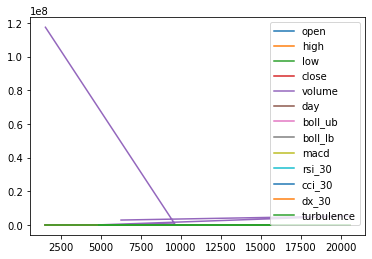

In [ ]:
%matplotlib inline
processed.sample(5).plot()

 Design Environment


In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(tech_indicators)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 30, State Space: 241


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, #initial_stocks: the initial shares of each stock and the default values are zeros.
    "buy_cost_pct": 0.001, #buy_cost_pct, sell_cost_pct: the transaction fee of each buying or selling transaction.
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicators,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4, #Deep Reinforcement Learning involves using a neural network as a universal function approximator to learn a value function that maps state-action pairs to their expected future reward given a particular reward function.
    "print_verbosity":5 #This flag allows you to write regular expressions that look nicer and are more readable by allowing you to visually separate logical sections of the pattern and add comments.
    
}

<a id='5'></a>
Implement DRL Algorithms


In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2018-01-01'
train_end = '2020-12-01' 
val_test_start = '2020-12-01' 
val_test_end = '2022-08-11'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }

TD3_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 30_000, 
                 'ppo' : 100_000, 
                 'ddpg' : 10_000,
                  'td3' : 30_000,
                  'sac' : 80_000
                 }


timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000,
                  'td3' : 10_000,
                  'sac' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                  TD3_model_kwargs,
                                                  SAC_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  276.50108923981816
======Model training from:  2018-01-01 to  2020-12-02
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cuda device
Logging to tensorboard_log/a2c/a2c_126_1
-------------------------------------
| time/                 |           |
|    fps                | 55        |
|    iterations         | 100       |
|    time_elapsed       | 9         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -42.5     |
|    explained_variance | 0.349     |
|    learning_rate      | 0.0005    |
|    n_updates          | 99        |
|    policy_loss        | 11.4      |
|    reward             | 0.6670409 |
|    std                | 0.999     |
|    value_loss         | 0.251     |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 86

In [ ]:
df_summary


,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe,TD3 Sharpe,SAC Sharpe
0,126,2020-12-02,2021-03-03,TD3,0.361991,-0.01769,0.183277,0.390809,0.308606
1,189,2021-03-03,2021-06-08,TD3,0.060128,-0.08754,0.091251,0.14543,0.077375
2,252,2021-06-08,2021-09-07,PPO,0.21663,0.604053,0.015393,-0.149714,0.456746
3,315,2021-09-07,2021-12-09,TD3,-0.112844,-0.17688,-0.396505,0.153208,-0.149398
4,378,2021-12-09,2022-03-10,A2C,-0.112812,-0.200642,-0.140587,-0.139377,-0.354346


In [ ]:
['A2C Sharpe','DDPG Sharpe','PPO Sharpe','SAC Sharpe','PPO Sharpe']

['A2C Sharpe', 'DDPG Sharpe', 'PPO Sharpe', 'SAC Sharpe', 'PPO Sharpe']

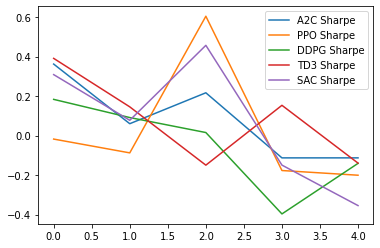

In [ ]:
%matplotlib inline
df_summary[['Val Start', 'Val End', 'Model Used', 'A2C Sharpe',
       'PPO Sharpe', 'DDPG Sharpe', 'TD3 Sharpe', 'SAC Sharpe']].plot()

<a id='6'></a>
# Backtest Our Strategy


In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
len(unique_trade_date)

420

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.0932091318523535


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,1000000.000000,2021-03-03,NaN,2021-03-03
1,997969.206335,2021-03-04,-0.002031,2021-03-04
2,988009.460523,2021-03-05,-0.009980,2021-03-05
3,968818.780973,2021-03-08,-0.019424,2021-03-08
4,981522.256925,2021-03-09,0.013112,2021-03-09


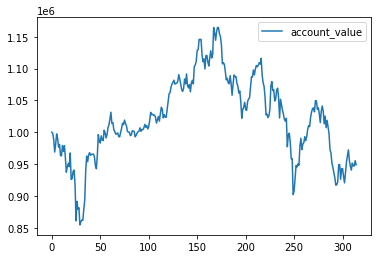

In [ ]:
%matplotlib inline
df_account_value[['account_value']].plot()

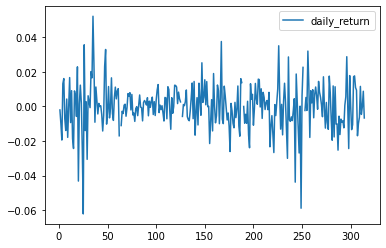

In [ ]:
%matplotlib inline
df_account_value[['daily_return']].plot()

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')
print(now)
perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
20220916-02h17
Annual return         -0.041148
Cumulative returns    -0.051168
Annual volatility      0.211642
Sharpe ratio          -0.093209
Calmar ratio          -0.182442
Stability              0.023861
Max drawdown          -0.225540
Omega ratio            0.983867
Sortino ratio         -0.126985
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.932498
Daily value at risk   -0.026743
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker='^DJI',     
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (322, 8)
Annual return          0.025009
Cumulative returns     0.032066
Annual volatility      0.149972
Sharpe ratio           0.240172
Calmar ratio           0.165925
Stability              0.000237
Max drawdown          -0.150722
Omega ratio            1.041154
Sortino ratio          0.328518
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.978336
Daily value at risk   -0.018752
dtype: float64


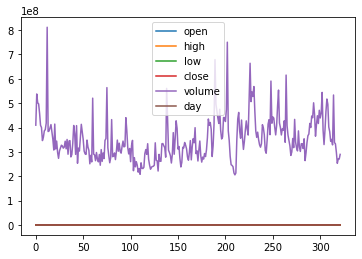

In [ ]:
%matplotlib inline
baseline_df.plot()

<a id='6.2'></a>
## 7.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (322, 8)


Start date,2021-03-03
End date,2022-06-10
Total months,15
,Backtest
Annual return,-4.115%
Cumulative returns,-5.117%
Annual volatility,21.164%
Sharpe ratio,-0.09
Calmar ratio,-0.18
Stability,0.02
Max drawdown,-22.554%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.55,2021-11-12,2022-03-07,NaT,NaN
1,14.56,2021-03-03,2021-04-19,2021-05-26,61
2,4.06,2021-10-14,2021-10-25,2021-11-08,18
3,3.76,2021-06-04,2021-06-17,2021-08-18,54
4,2.56,2021-09-27,2021-10-01,2021-10-07,9


Stress Events,mean,min,max
New Normal,-0.01%,-6.21%,5.21%


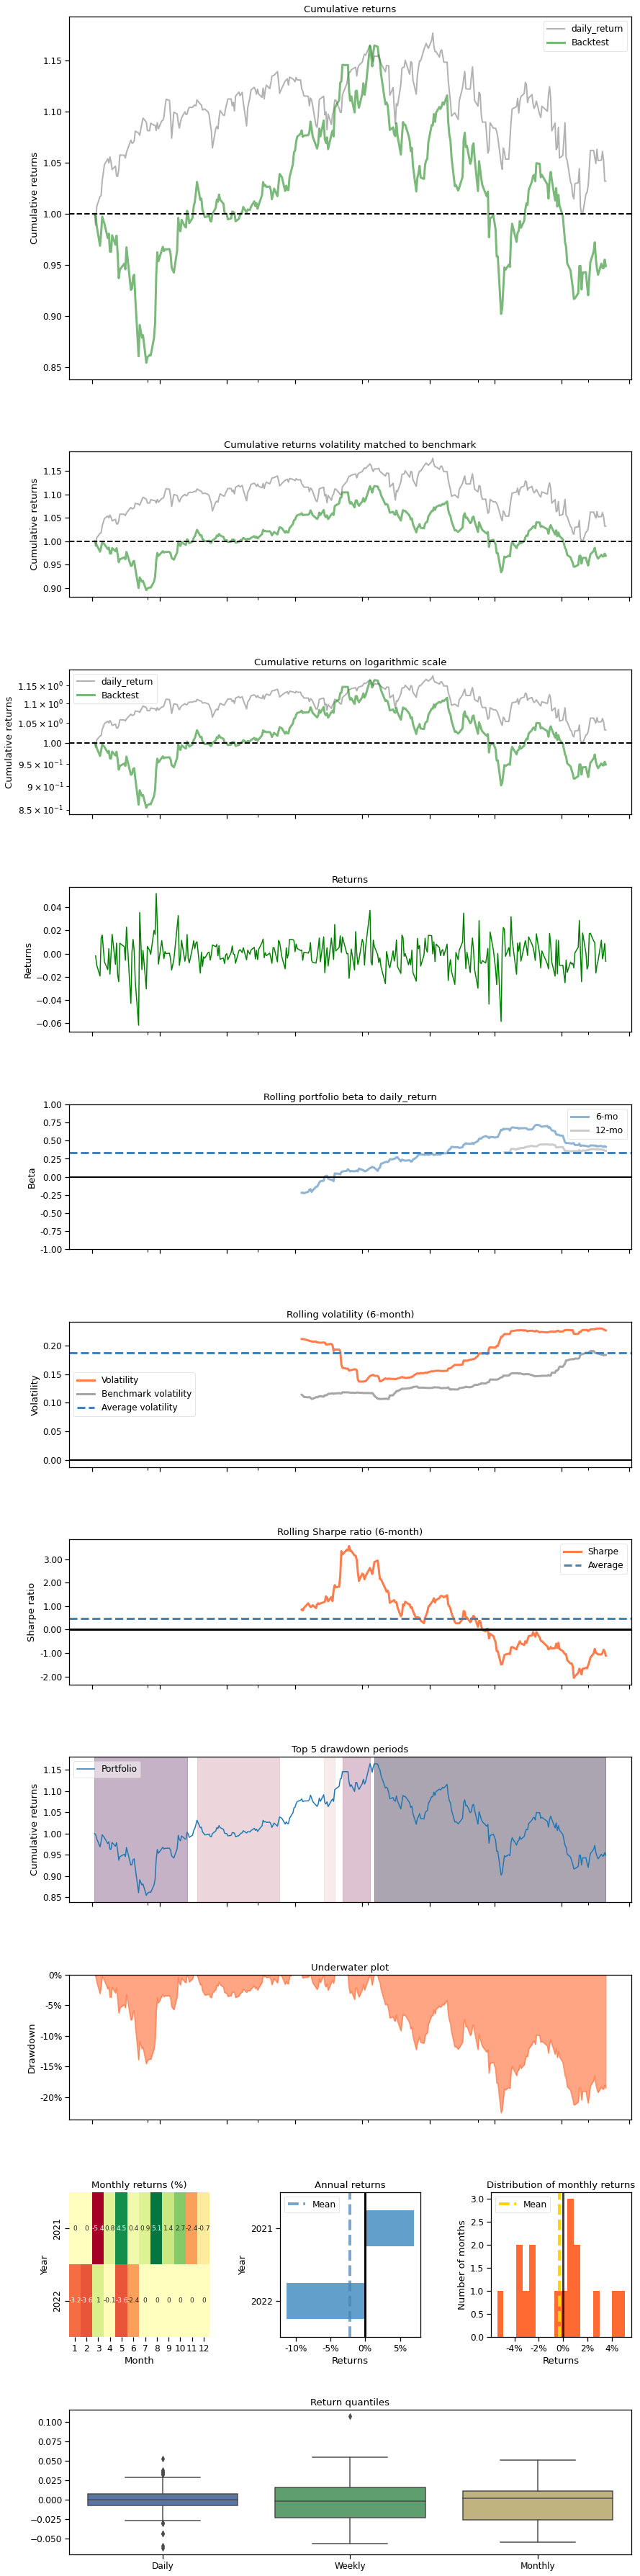

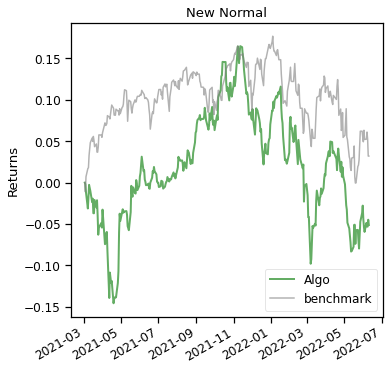

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])